In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Lib')
sys.path.append('../Models')
import simulator_scipy
import simulator_myokit
import model_response
from br1977 import BR1977
from ord2011 import ORD2011
import mod_kernik as kernik

import mod_trace as trace

import myokit

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False):    
    model_name = trial_conditions.split('_')[0]
    currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_CaL', 'I_K1', 'I_NaL' ]   
    if model_name=='BR1977':
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']
    elif model_name=='Kernik':
        currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_F', 'I_CaL', 'I_K1']
    elif model_name=='OHara2017':
        currents = ['INa', 'INaL', 'Ito', 'ICaL', 'IKr', 'IKs', 'IK1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_a{with_artefact}', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
                
        tr = None
        if model_name=='ORD2011' :
            model = ORD2011(protocol)
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='OHara2017':            
            model = "../mmt-model-files/ohara-cipa-v1-2017_JK-v1.mmt"                                                            
            tr = model_response.get_model_response_with_myokit( model, protocol, prestep=prestep )            
        elif model_name=='BR1977' :
            model = BR1977(protocol)  
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='Kernik':
            k = kernik.KernikModel(is_exp_artefact=True)        
            tr = k.generate_response(protocol, is_no_ion_selective=False)
               
        tr.plot_currents_contribution(current,  window=window, step_size=step_size, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')
        
        print(tr.current_response_info.get_max_current_contributions(tr.t, window=window, step_size=step_size))
        print('-'*100)

|RAMP: Voltage Start: -31.830239198186373, Voltage End: 20.27411268958194, Duration: 634.3221135409801| + |STEP: Voltage: -51.23936789546639, Duration: 306.00427827164606| + |STEP: Voltage: -119.74766725773256, Duration: 34.50926304778282| + |STEP: Voltage: -47.668699140324236, Duration: 650.1095662197226|


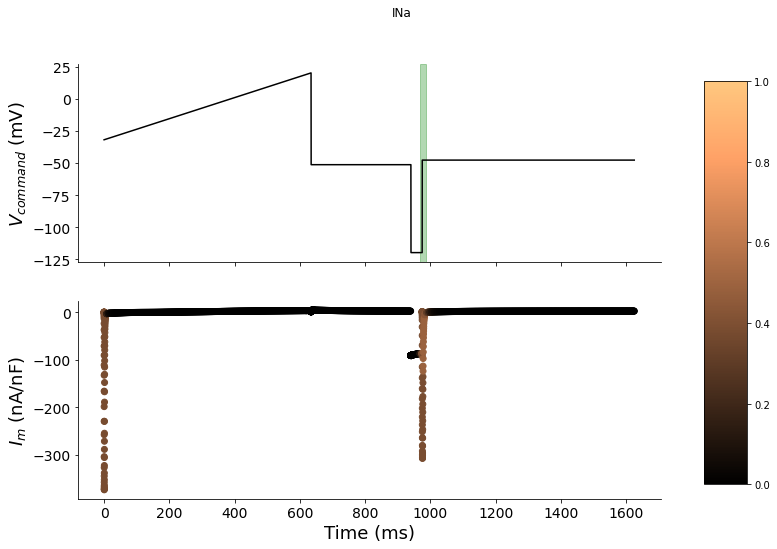

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.489803       975.0     985.0
2       INaL      0.244494        25.0      35.0
3        Ito      0.034543       245.0     255.0
4       ICaL      0.297437       165.0     175.0
5      ICaNa      0.023451       170.0     180.0
6       ICaK      0.004431       345.0     355.0
7        IKr      0.413472       200.0     210.0
8        IKs      0.098307       620.0     630.0
9        IK1      0.496948       960.0     970.0
10     INaCa      0.045988        70.0      80.0
11  INaCa_ss      0.122022        15.0      25.0
12      INaK      0.054184       990.0    1000.0
13       IKb      0.045513       620.0     630.0
14      INab      0.006651       990.0    1000.0
15      ICab      0.006717       990.0    1000.0
16      IpCa      0.000058       990.0    1000.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

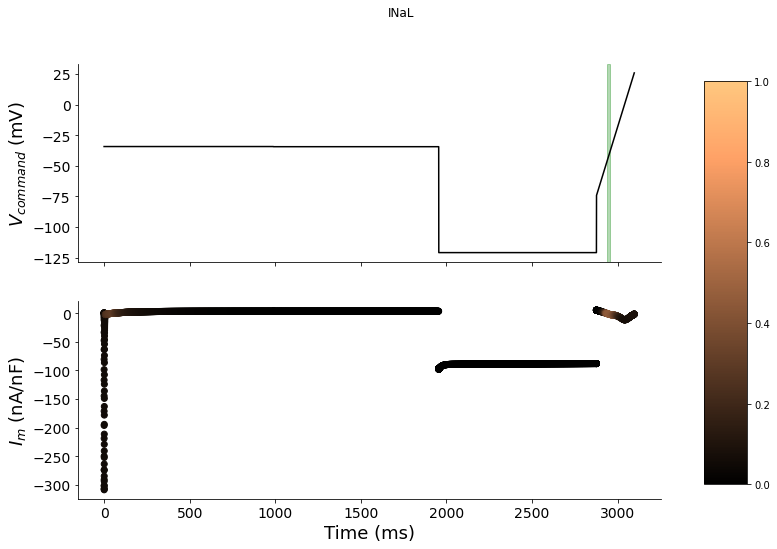

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.380824         0.0      10.0
2       INaL      0.454706      2945.0    2955.0
3        Ito      0.041744      3085.0    3095.0
4       ICaL      0.371410      3045.0    3055.0
5      ICaNa      0.053465      3085.0    3095.0
6       ICaK      0.041315      3085.0    3095.0
7        IKr      0.416307      1940.0    1950.0
8        IKs      0.006473      3085.0    3095.0
9        IK1      0.499164      2865.0    2875.0
10     INaCa      0.051396        55.0      65.0
11  INaCa_ss      0.122449        20.0      30.0
12      INaK      0.050426        50.0      60.0
13       IKb      0.027724      3085.0    3095.0
14      INab      0.006267      2925.0    2935.0
15      ICab      0.006399      2925.0    2935.0
16      IpCa      0.000067        50.0      60.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

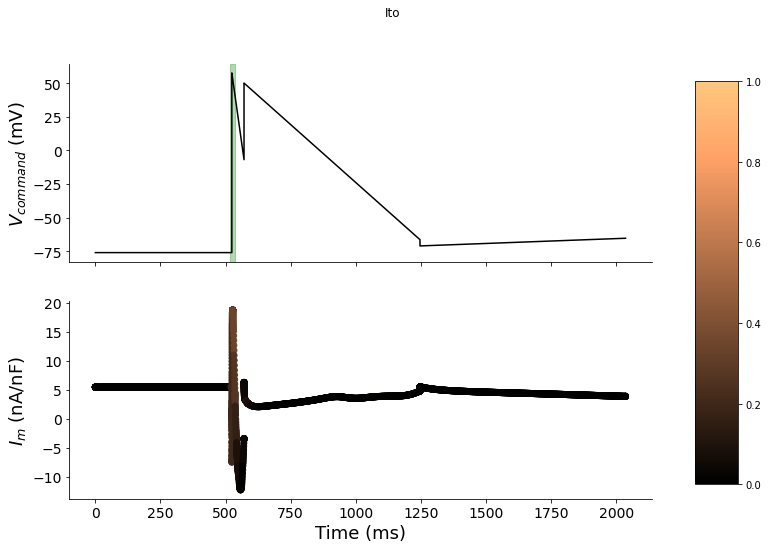

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.130609       515.0     525.0
2       INaL      0.032635       655.0     665.0
3        Ito      0.341982       525.0     535.0
4       ICaL      0.405392       555.0     565.0
5      ICaNa      0.081720       535.0     545.0
6       ICaK      0.138376       530.0     540.0
7        IKr      0.404335      1015.0    1025.0
8        IKs      0.091921       800.0     810.0
9        IK1      0.486443         0.0      10.0
10     INaCa      0.032527       515.0     525.0
11  INaCa_ss      0.021754      1015.0    1025.0
12      INaK      0.055040       515.0     525.0
13       IKb      0.131365       515.0     525.0
14      INab      0.003342      2025.0    2035.0
15      ICab      0.003612      2025.0    2035.0
16      IpCa      0.000065       640.0     650.0
----------------------------------------------------------------------------------------------------
|RAMP: Voltage St

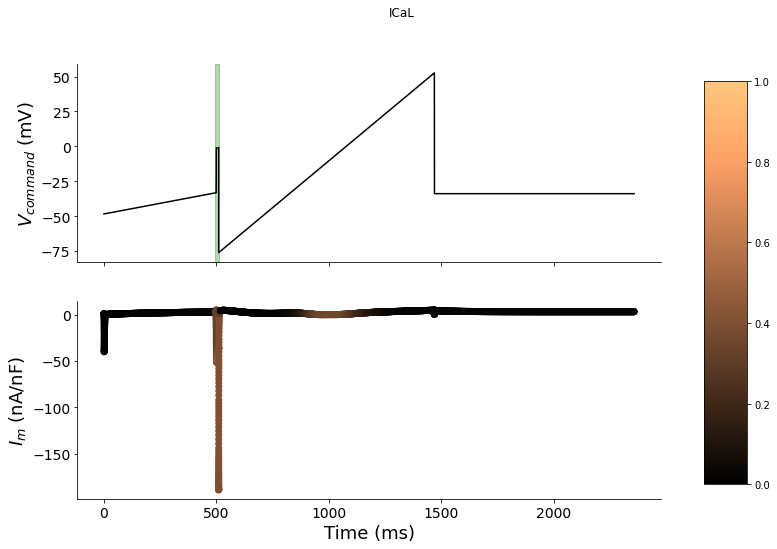

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.383567         0.0      10.0
2       INaL      0.165205        10.0      20.0
3        Ito      0.034259        10.0      20.0
4       ICaL      0.453560       500.0     510.0
5      ICaNa      0.037554       500.0     510.0
6       ICaK      0.009859      1095.0    1105.0
7        IKr      0.422225       930.0     940.0
8        IKs      0.189525      1455.0    1465.0
9        IK1      0.412810       555.0     565.0
10     INaCa      0.082070       685.0     695.0
11  INaCa_ss      0.094630       515.0     525.0
12      INaK      0.055856        10.0      20.0
13       IKb      0.074230      1455.0    1465.0
14      INab      0.007062        10.0      20.0
15      ICab      0.007142        10.0      20.0
16      IpCa      0.000076       715.0     725.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

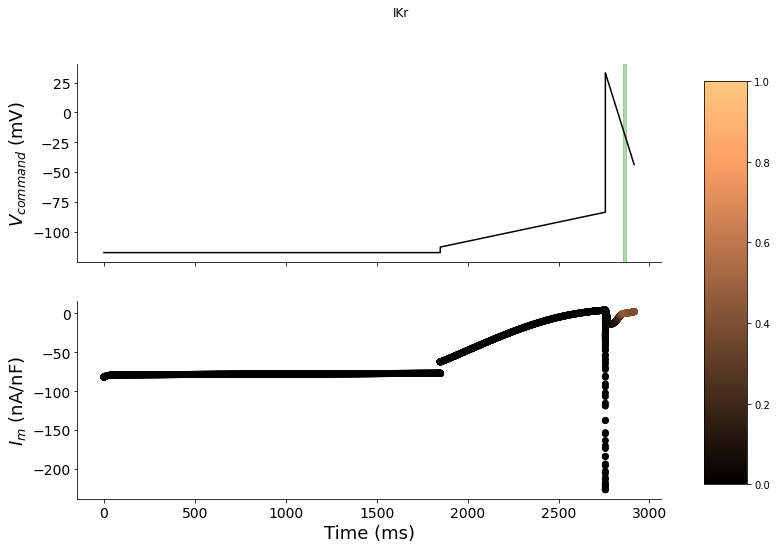

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.263711      2750.0    2760.0
2       INaL      0.252797      2855.0    2865.0
3        Ito      0.187501      2760.0    2770.0
4       ICaL      0.371735      2780.0    2790.0
5      ICaNa      0.089830      2760.0    2770.0
6       ICaK      0.094177      2760.0    2770.0
7        IKr      0.445434      2860.0    2870.0
8        IKs      0.006701      2855.0    2865.0
9        IK1      0.498977        10.0      20.0
10     INaCa      0.113296      2595.0    2605.0
11  INaCa_ss      0.038810      2855.0    2865.0
12      INaK      0.267537      2595.0    2605.0
13       IKb      0.032097      2750.0    2760.0
14      INab      0.074512      2595.0    2605.0
15      ICab      0.084227      2595.0    2605.0
16      IpCa      0.000305      2595.0    2605.0
----------------------------------------------------------------------------------------------------
|RAMP: Voltage St

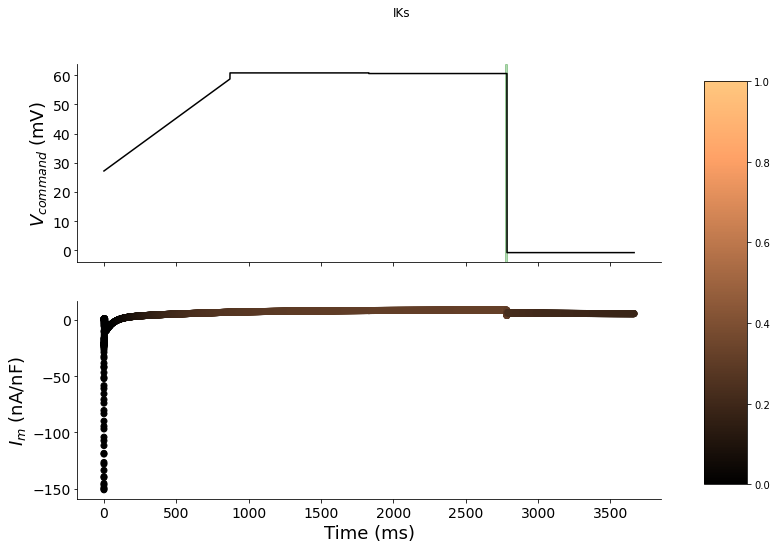

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.090920         0.0      10.0
2       INaL      0.057283        95.0     105.0
3        Ito      0.222961         5.0      15.0
4       ICaL      0.384042        15.0      25.0
5      ICaNa      0.109029         5.0      15.0
6       ICaK      0.103326         5.0      15.0
7        IKr      0.294594       135.0     145.0
8        IKs      0.340219      2775.0    2785.0
9        IK1      0.001539      2780.0    2790.0
10     INaCa      0.038916       875.0     885.0
11  INaCa_ss      0.027560         5.0      15.0
12      INaK      0.038207       165.0     175.0
13       IKb      0.074704       180.0     190.0
14      INab      0.000868      2780.0    2790.0
15      ICab      0.000538      2780.0    2790.0
16      IpCa      0.000080       105.0     115.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -

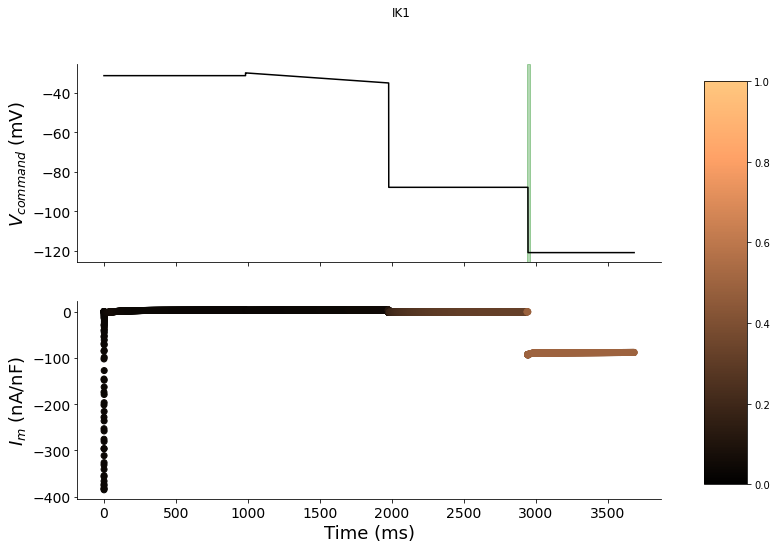

     Current  Contribution  Time Start  Time End
0      i_ion      0.000000         0.0      10.0
1        INa      0.382067         0.0      10.0
2       INaL      0.274459        55.0      65.0
3        Ito      0.032964        60.0      70.0
4       ICaL      0.110712      1970.0    1980.0
5      ICaNa      0.006156      1970.0    1980.0
6       ICaK      0.000468        60.0      70.0
7        IKr      0.428696      1010.0    1020.0
8        IKs      0.001557      1220.0    1230.0
9        IK1      0.499210      2945.0    2955.0
10     INaCa      0.141022      2020.0    2030.0
11  INaCa_ss      0.126070        15.0      25.0
12      INaK      0.191202      2930.0    2940.0
13       IKb      0.006348        60.0      70.0
14      INab      0.047762      2930.0    2940.0
15      ICab      0.053938      2930.0    2940.0
16      IpCa      0.000209      2080.0    2090.0
----------------------------------------------------------------------------------------------------
=====Complete====

In [4]:
if __name__ == '__main__':
    trial_conditions = "OHara2017_360_100_4_-121_61_10_5"
    plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False)  
    print("=====Complete==============================")